# Machine Learning PROJECT
### SENTIMENT ANALYSIS using CNN and RNN

###### Sentiment analysis is a process used to analyze and classify text data. The classification is done as negative, positive, neutral, or other times just a binary classification, positive or negative, as in my case.After the classification, it is extracted also a few features of the expression as, for example:
###### 1. Polarity (positive or negative)
###### 2. Subject (what is talking about)
###### 3. Opinion holder (who is talking)
###### At the moment, Sentiment Analysis is one of the most interesting and developing topic, this is due to its young discover and the large number of applications it has. Different companies uses Sentiment Analysis to analyze the customer ideas about their new products or services, throught online reviews or twitters; in that way they can understand what they should change, if the product is good enough or not, and so on. The last field of Sentiment Analysis application is the prediction of the stock market, in fact, it has been noticed that the positive or negative opinions on economic articles or tweets about companies can make the shares on the stock exchange vary up or down.


## Libraries Required

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


from numpy import array
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dense
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


###### The files used for that project are bigger than 50MB, so I have paste here both links

## Dataset used
###### The dataset has 50.000 data and 2 columns: the first one contains text reviews and the second one the sentiment of the correspond review (negative or positive, not neutral). So my problem is a binary classification,  if it has also the neutral sentiment it should be possible to, after plotted the percentage of the three sentiments, delete it, because the neutral sentiment doesn't suggest us nothing about the audiance opinion.


###### YOU CAN DOWNLOAD THE DATASET FROM THE FOLLOWING LINK:  https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
movie_reviews = pd.read_csv("C:/Users/loren/Desktop/LSBU/MachineLearning/ProjectML/IMDB Dataset.csv/IMDB Dataset.csv")

## Dataset analysis

In [3]:
movie_reviews.isnull().values.any() #check if there are any null values

False

In [4]:
movie_reviews.shape 

(50000, 2)

In [5]:
movie_reviews.head() 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
movie_reviews['review'][10]

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn\'t find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try "Brother from another planet"'

In [7]:
movie_reviews['sentiment'][10]

'negative'

### Dataset visualization

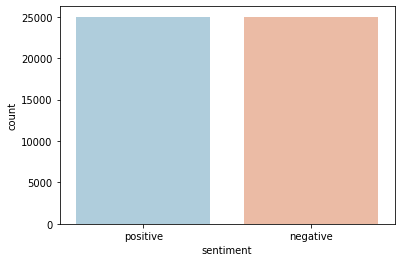

In [8]:
import seaborn as sns
sns.countplot(x='sentiment', data=movie_reviews, palette='RdBu_r')
plt.show()
#same number of positive and negative reviews, 25.000 each

## Data preprocessing 

###### How seen before, the reviews text is not clean, it contains punctuations and HTML tags, for that reason I have to clean it in some way. I have defined teh function clean_text that takes a a string (our review) as parameter and then remove all the characters that I don't need.

In [9]:
rem_tags = re.compile(r'<[^>]+>')   
# We can combine a regular expression pattern into pattern objects, which can be used for pattern matching. It also helps to search a pattern again without rewriting it.

def remove_tags(text):
    return rem_tags.sub('', text)

In [10]:
def clean_text(phrase):
    # Removing html tags
    sentence = remove_tags(phrase) # replaces anything between opening and closing <> with an empty space

    # Remove punctuations and numbers and replace with empty spaces
    sentence = re.sub('[^a-zA-Z]', ' ', sentence) #the only things that are not removed here are the small and capital english letters

    # Remove single character and repleace with empty spaces
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) 

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

###### Once preprocess our reviews, those will be store in a new list

In [11]:
X = []
sentences = list(movie_reviews['review'])
for phrase in sentences:
    X.append(clean_text(phrase))

In [12]:
X[10] #same review of before, but now it is clean

'Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines At first it was very odd and pretty funny but as the movie progressed didn find the jokes or oddness funny anymore Its low budget film thats never problem in itself there were some pretty interesting characters but eventually just lost interest imagine this film would appeal to stoner who is currently partaking For something similar but better try Brother from another planet '

###### At that point, I have to change the sentiment in digits, we have just pos and neg sentiments, so I can convert those in 1 if positive and 0 if negative.

In [13]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y))) 

In [14]:
y[10] #the review 10 is negative as before

0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) #80% training, 20% test

### Preparing Embedding layer

###### I have used the Tokenizer class to create a word-to-index dictionary. In the word-to-index dictionary, each word in the corpus is used as a key, while a corresponding unique index is used as the value for the key.

In [16]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=90000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train) #transform each text in texts in a sequence of integers 
X_test = tokenizer.texts_to_sequences(X_test)

###### The X_train and X_test were trasformed in lists where each of them contains integers. Each list corresponds to each sentence in the training set, and each size list is different from the other, the reason is that each review has different lenghts.

In [17]:
X_train[0:2] #first two lists 

[[10,
  1,
  919,
  3,
  1,
  8840,
  9,
  286,
  193,
  2450,
  1808,
  2,
  1964,
  2961,
  2550,
  7,
  102,
  2846,
  552,
  1243,
  16,
  1,
  1089,
  13764,
  10,
  999,
  29,
  1,
  4082,
  1226,
  3,
  1,
  1243,
  101,
  134,
  1,
  304,
  106,
  130,
  106,
  171,
  10,
  999,
  35672,
  29,
  533,
  1528,
  29,
  1618,
  28227,
  31,
  1411,
  1,
  16,
  2540,
  4,
  12015,
  1214,
  186,
  5,
  1,
  12016,
  16,
  9,
  5,
  122,
  448,
  1,
  581,
  3238,
  3,
  2,
  1,
  191,
  9,
  106,
  130,
  106,
  171,
  5,
  993,
  3,
  12015,
  106,
  130,
  106,
  171,
  42,
  1,
  7128,
  3,
  6697,
  24,
  3,
  1,
  112,
  5572,
  118,
  6820,
  13,
  1243,
  16,
  6,
  26,
  528,
  14,
  1964,
  2961,
  3364,
  4,
  1,
  283,
  1243,
  13,
  1,
  84,
  53,
  231,
  7441,
  21,
  1363,
  2961,
  227,
  25,
  931,
  89,
  20,
  10,
  89,
  15,
  20,
  290,
  122,
  125,
  89,
  20,
  113,
  7,
  7441,
  21,
  1363,
  1,
  1243,
  3,
  106,
  130,
  106,
  171,
  5,
  1,
  17189,


In [18]:
if len(X_train[0])==len(X_test[0]):
    print(True)
else:
    print(False)

False


In [19]:
len(X_train)

40000

In [20]:
len(X_train[0])

960

In [21]:
len(X_test[0])

167

###### Now there is the necessity to have the lists all of the same lenght, so the lists with size greater than the max lenght decided will be truncated to that value. Instead for the lists that have length less than that value, it will be add 0 at the end of the list until it reaches the max length. This process is called padding.
##### Initially I have used as maxlen=100, but I have noticed how, after differents trials on the CNN, the model didn't improve more than 75%, so I have decided to change in it the max lenght value, and I have computed the 'optimal' value as the avarege of all the  reviews lenght. This action has improved the test accuracy of my model over the 80%.

In [22]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

a=0
b=0
c=0
d=0

for i in X_train:
    a=a+int(len(i))
    b=b+1
for i in X_test: 
    c=c+int(len(i))
    d=d+1
    
z=a+c
w=b+d

avglen= z//w
avglen

X_train1 = pad_sequences(X_train, padding='post', maxlen=avglen)
X_test1 = pad_sequences(X_test, padding='post', maxlen=avglen)

###### Instead in the LSTM model I was not able to use as value 208, because it slowed too much the model (more than 30 minutes after 6 epochs), without reaches any better results.

In [23]:
maxlen=100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

###### Now if you view the X_train or X_test, you will see that all the lists have same length.

In [24]:
if len(X_train[0])==len(X_test[0]):
    print(True)
else:
    print(False)

True


In [25]:
len(X_train[0]) #every list now has the same lenght

100

In [26]:
len(X_test[0])

100

In [27]:
vocab_size

92335

###### I have used GloVe (Global Vectors) embeddings to create the feature matrix. After loading the GloVe word embeddings, I have created a dictionary that will contain words as keys and their corresponding embedding list as values.

###### YOU CAN DOWNLOAD THE GLOVE FILE FROM THE FOLLOWING LINK: https://www.kaggle.com/terenceliu4444/glove6b100dtxt

In [28]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:/Users/loren/Desktop/LSBU/MachineLearning/ProjectML/glove.6B.100d.txt/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

###### Here, I have created the embedding matrix where each row number will correspond to the index of the word in the corpus. The matrix will have 100 columns where each column will contain the GloVe word embeddings for the words in the corpus.

In [29]:
embedding_matrix = zeros((vocab_size, 100))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
         embedding_matrix[index] = embedding_vector

## Convolution Neural Network

###### Convolution Neural Network is one of the most famous NN, pricipally it is used for the 2D classification, as images. It attempts to discover explicit highlights in a picture in the first layer. In the following layers, the first recognized highlights are combined to frame greater highlights. Along these steps,  the entire picture is detected. CNN is not only used for images, where it performs at its best, but it is also used to work with texts, therefore at one dimension, for that reason we can use 1D convolutional neural networks to extract features from our data.

###### I have created a Sequential model, followed by an embedding layer. Then I have added: one-dimensional convolutional layer with 100 filters, the kernel size is 2 and the activation function used is relu; a global max pooling layer to reduce feature size and at the end one dense layer with sigmoid activation. To complete the model, I have used the stochastic gradient descent optimizer, that permorms better that the adam optimizer in this NN, with binary_crossentropy as loss function and accuracy as metrics.

In [30]:
from keras.layers import Conv1D
from keras import optimizers

model= Sequential()

e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=avglen, trainable=False)
model.add(e)

model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [31]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 220, 100)          9233500   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 219, 100)          20100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 9,279,713
Trainable params: 46,213
Non-trainable params: 9,233,500
_________________________________________________________________
None


###### I have used the fit method to train the neural network. The validation_split of 0.2 means that 20% of the training data is used to find the training accuracy of the algorithm. To evaluate the performance of the model, I have just used the test set to the evaluate method of the model.

In [32]:
history = model.fit(X_train1, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)


Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 19s 605us/step - loss: 0.6900 - accuracy: 0.5317 - val_loss: 0.6779 - val_accuracy: 0.5807
Epoch 2/10
32000/32000 [==============================] - 18s 566us/step - loss: 0.6684 - accuracy: 0.6171 - val_loss: 0.6584 - val_accuracy: 0.6064
Epoch 3/10
32000/32000 [==============================] - 18s 571us/step - loss: 0.6416 - accuracy: 0.6643 - val_loss: 0.6212 - val_accuracy: 0.6954
Epoch 4/10
32000/32000 [==============================] - 18s 552us/step - loss: 0.5994 - accuracy: 0.7075 - val_loss: 0.5666 - val_accuracy: 0.7411
Epoch 5/10
32000/32000 [==============================] - 18s 557us/step - loss: 0.5334 - accuracy: 0.7550 - val_loss: 0.4958 - val_accuracy: 0.7791
Epoch 6/10
32000/32000 [==============================] - 18s 552us/step - loss: 0.4702 - accuracy: 0.7853 - val_loss: 0.4424 - val_accuracy: 0.8006
Epoch 7/10
32000/32000 [==============================] 

In [33]:
score = model.evaluate(X_test1, y_test, verbose=1)

10000/10000 [==============================] - 2s 222us/step


In [34]:
print("Test Accuracy:", score[1])

Test Accuracy: 0.8245000243186951


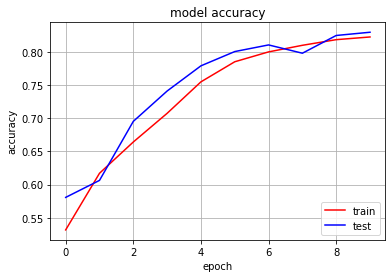

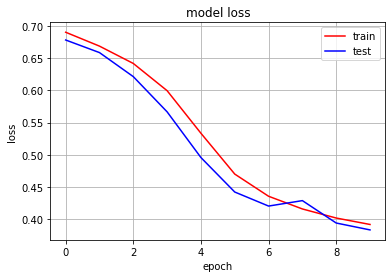

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red')
plt.plot(history.history['val_accuracy'], color='blue')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right')
plt.grid(True)
plt.show()

## Recurrent Neural Network (LSTM)

###### Recurrent neural network is a  of neural networks that performs well with sequence data. In that case, with sentiment analysis, the RNN is the best choice, because text are sequence of words. I have used an LSTM (Long Short Term Memory) which is a variant of RNN, because while the model is training, the information goes in loop and updates too much the RNN model weights. LSTM can solve this problem because it uses gates to control the memorizing process.

###### I started by initializing a sequential model followed by the creation of the embedding layer. Then, after created a LSTM layer with 128 neurons, I have added one Dense layers, with a sigmoid as activation function, as before, but this time I used the adam optimizer. 

In [36]:
from keras.layers import LSTM

model1= Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False)
model1.add(e)

model1.add(LSTM(128))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [37]:
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          9233500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 9,350,877
Trainable params: 117,377
Non-trainable params: 9,233,500
_________________________________________________________________
None


In [38]:
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/5
32000/32000 [==============================] - 77s 2ms/step - loss: 0.5587 - acc: 0.7120 - val_loss: 0.4652 - val_acc: 0.7810
Epoch 2/5
32000/32000 [==============================] - 77s 2ms/step - loss: 0.4574 - acc: 0.7887 - val_loss: 0.4813 - val_acc: 0.7914
Epoch 3/5
32000/32000 [==============================] - 78s 2ms/step - loss: 0.4093 - acc: 0.8126 - val_loss: 0.3830 - val_acc: 0.8301
Epoch 4/5
32000/32000 [==============================] - 77s 2ms/step - loss: 0.3740 - acc: 0.8316 - val_loss: 0.3659 - val_acc: 0.8381
Epoch 5/5
32000/32000 [==============================] - 136s 4ms/step - loss: 0.3498 - acc: 0.8442 - val_loss: 0.3444 - val_acc: 0.8503


In [39]:
score = model1.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 12s 1ms/step


In [40]:
print("Test Accuracy:", score[1])

Test Accuracy: 0.8463000059127808


###### The test accuracy is better than in the CNN

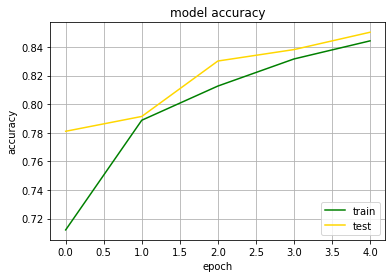

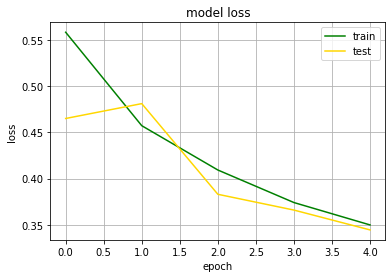

In [41]:
plt.plot(history1.history['acc'], color='green')
plt.plot(history1.history['val_acc'], color='gold')

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower right')
plt.grid(True)
plt.show()

plt.plot(history1.history['loss'], color='green')
plt.plot(history1.history['val_loss'], color='gold')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.grid(True)
plt.show()

###### From the results we can undesrtand that the LSTM model perform better than the CNN model, in fact, the test acuracy for the convolution network is around 80%, instead the accuracy for the short term memory is about 85%, furthermore to achieve that result in the first case I had to use double epochs. The drawback of the LSTM model for sure is the long time, in confront of CNN, that it takes for each iteration.

###### CNN  more useful when the input has grid structure like in images, videos, etc. RNN is better for sequential input like speech, text, etc. LSTM are even better than regular RNN as they can consider long term dependencies between important events over indefinite length.

## Prediction on single instance

###### To predict the sentiment of this review, I have converted this review into numeric form, using the tokenizer (created in word embedding section). The text_to_sequences method convert the sentence into its numeric counter part. Then I used pad_sequences function as before and finally the prediction.

In [42]:
#LSTM prediction

#positive review

instance = X[80]
print(instance)

y[80]

Stephen Hawkings is genius He is the king of geniuses Watching this movie makes me feel dumb But it a great movie Not highly entertaining but very very intriguing The movie centers around wheelchair bound Stephen Hawkings man who makes Einstein look average and his theories and scientific discoveries about the universe time the galaxy and black holes Everyone at sometime or another during really intense high comes to moment when they think they got the universe and the cosmos figured out and they swear as soon as they sober up they ll write it all down Well here is man who actually held that feeling for more then six hours Here is man who despite suffering from Lou Gehrig disease has become the greatest mind the world has yet seen Watch this and listen in on how he has formulated theories on black holes Awesome You won be the same after you see it 


1

In [43]:
#negative review

instance = tokenizer.texts_to_sequences(instance)
flat_list = []

for sublist in instance:
    for item in sublist:
        flat_list.append(item)
        
flat_list = [flat_list]
instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)
p = model1.predict(instance)
if p < 0.5:
    print ('Negative Review')    
else:
    print('Positive Review')
    
print(p)

Positive Review
[[0.977736]]


In [44]:
instance1 = X[10]
print(instance1)

y[10]

Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines At first it was very odd and pretty funny but as the movie progressed didn find the jokes or oddness funny anymore Its low budget film thats never problem in itself there were some pretty interesting characters but eventually just lost interest imagine this film would appeal to stoner who is currently partaking For something similar but better try Brother from another planet 


0

In [45]:
instance1 = tokenizer.texts_to_sequences(instance1)
flat_list = []

for sublist in instance1:
    for item in sublist:
        flat_list.append(item)
        
flat_list = [flat_list]
instance1 = pad_sequences(flat_list, padding='post', maxlen=maxlen)
p = model1.predict(instance1)
if p < 0.5:
    print ('Negative Review')    
else:
    print('Positive Review')
    
print(p)

Negative Review
[[0.24995346]]


###### Before I have mapped the positive outputs to 1 and the negative outputs to 0. However, the sigmoid function predicts floating value between 0 and 1. If the value is less than 0.5, the sentiment is considered negative where as if the value is greater than 0.5, the sentiment is considered as positive.

###### Happens that also my LSTM model predicts in the wrong way the review, this is due to the fact that should be improve more.

## Differences between TextBlob and LSTM

###### Another easy way to understand the sentiment of a test can be the following. It is easier and faster to implement, and it uses a pre-trained library of Python, TextBlob, in fact, in that way there is not need to create a NN.

In [46]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


###### TextBlob is a Python library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks.

In [47]:
from textblob import TextBlob 
import nltk

###### Text1 below is the same review used before for the negative sentence (X[10])

In [48]:
text1='Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines At first it was very odd and pretty funny but as the movie progressed didn find the jokes or oddness funny anymore Its low budget film thats never problem in itself there were some pretty interesting characters but eventually just lost interest imagine this film would appeal to stoner who is currently partaking For something similar but better try Brother from another planet '

In [49]:
obj1=TextBlob(text1)
sentiment1=obj1.sentiment.polarity

if sentiment1==0:
    print('The text is Neutral')   
elif sentiment1<0:
    print('The text is Negative')
else:
    print('The text is Positive')
    
print(sentiment1)

The text is Positive
0.12738095238095237


###### How we can see, TextBlob is not able to understand the polarity of big sentences, as the review that I have used, in fact, there is a difference with my LSTM model that classify that review as negative. Reading the review you can understand that TextBlob is in error. However, doing more test on it I have noticed how it is able to recognize short phrases clearly negative or positive, as the following.

In [50]:
test= TextBlob('I hate at all that place, it is terrible!')
sentiment=test.sentiment.polarity

if sentiment==0:
    print('The text is Neutral')    
elif sentiment<0:
    print('The text is Negative')    
else:
    print('The text is Positive')
    
print(sentiment)


The text is Negative
-0.9


###### So we can use TextBlob for checking short sentences, instead to do a deeper study of the data, use a good NN is preferable.